In [22]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [97]:
file = 'out2021_02_26_habdishab_exp_rat1_crop2_trim1DLC_dlcrnetms5_NewProjectExtraLabelMar9shuffle1_100000_el.csv'
df = pd.read_csv(file)
one_pixel = 0.102 #cm
threshold = 2

In [212]:
def data(file):

    df = pd.read_csv(file)

    one_pixel = 0.102 #cm

    threshold = 2 #maximum distance between body parts in cm 
    
    return df

In [213]:
df

,scorer,DLC_dlcrnetms5_NewProjectExtraLabelMar9shuffle1_100000,DLC_dlcrnetms5_NewProjectExtraLabelMar9shuffle1_100000.1,DLC_dlcrnetms5_NewProjectExtraLabelMar9shuffle1_100000.2,DLC_dlcrnetms5_NewProjectExtraLabelMar9shuffle1_100000.3,DLC_dlcrnetms5_NewProjectExtraLabelMar9shuffle1_100000.4,DLC_dlcrnetms5_NewProjectExtraLabelMar9shuffle1_100000.5,DLC_dlcrnetms5_NewProjectExtraLabelMar9shuffle1_100000.6,DLC_dlcrnetms5_NewProjectExtraLabelMar9shuffle1_100000.7,DLC_dlcrnetms5_NewProjectExtraLabelMar9shuffle1_100000.8,...,DLC_dlcrnetms5_NewProjectExtraLabelMar9shuffle1_100000.35,DLC_dlcrnetms5_NewProjectExtraLabelMar9shuffle1_100000.36,DLC_dlcrnetms5_NewProjectExtraLabelMar9shuffle1_100000.37,DLC_dlcrnetms5_NewProjectExtraLabelMar9shuffle1_100000.38,DLC_dlcrnetms5_NewProjectExtraLabelMar9shuffle1_100000.39,DLC_dlcrnetms5_NewProjectExtraLabelMar9shuffle1_100000.40,DLC_dlcrnetms5_NewProjectExtraLabelMar9shuffle1_100000.41,dist,dist_cm,interaction
0,individuals,rat1,rat1,rat1,rat1,rat1,rat1,rat1,rat1,rat1,...,rat2,rat2,rat2,rat2,rat2,rat2,rat2,NaN,NaN,False
1,bodyparts,snout,snout,snout,right ear,right ear,right ear,left ear,left ear,left ear,...,thoracic spine,lumbar spine,lumbar spine,lumbar spine,tail base,tail base,tail base,NaN,NaN,False
2,coords,x,y,likelihood,x,y,likelihood,x,y,likelihood,...,likelihood,x,y,likelihood,x,y,likelihood,NaN,NaN,False
3,0,291.96,376.862,1.0,267.196,347.141,1.0,297.405,340.237,1.0,...,1.0,806.253,66.205,1.0,NaN,NaN,1.0,NaN,NaN,False
4,1,291.413,376.084,1.0,266.813,346.822,1.0,297.328,339.255,1.0,...,1.0,806.25,66.199,1.0,NaN,NaN,1.0,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8988,8985,223.985,62.585,1.0,276.261,47.833,1.0,271.112,75.665,1.0,...,1.0,431.321,160.928,1.0,NaN,NaN,1.0,NaN,NaN,False
8989,8986,224.323,62.348,1.0,277.064,46.401,1.0,272.788,75.931,1.0,...,1.0,440.473,159.731,1.0,NaN,NaN,1.0,NaN,NaN,False
8990,8987,224.324,62.348,1.0,277.066,46.401,1.0,272.789,75.932,1.0,...,1.0,440.476,159.731,1.0,NaN,NaN,1.0,NaN,NaN,False
8991,8988,225.386,62.068,1.0,278.815,47.741,1.0,275.822,78.838,1.0,...,1.0,440.196,160.422,1.0,NaN,NaN,1.0,NaN,NaN,False


In [214]:
snout1 = df.iloc[3:,[1,2]]

rightear1 = df.iloc[3:,[4,5]]

leftear1 = df.iloc[3:,[7,8]]

dorsal1 = df.iloc[3:,[10,11]]

thoracic1 = df.iloc[3:,[13,14]]

lumbar1 = df.iloc[3:,[16,17]]

tail1 = df.iloc[3:,[19,20]]

snout2 = df.iloc[3:,[22,23]]
                    
rightear2 = df.iloc[3:,[25,26]]

leftear2 = df.iloc[3:,[28,29]]

dorsal2 = df.iloc[3:,[31,32]]

thoracic2 = df.iloc[3:,[34,35]]
                    
lumbar2 = df.iloc[3:,[37,38]]

tail2 = df.iloc[3:,[40,41]]

In [215]:
two_labels = [[snout1, snout2], [snout1, rightear2], [snout1, leftear2], [snout1,dorsal2], [snout1,thoracic2], [snout1, lumbar2], [snout1, tail2] ,[rightear1, snout2], [leftear1, snout2], [dorsal1, snout2],  [thoracic1, snout2], [lumbar2, snout2], [tail1, snout2]] #all combinations of behaviours of interest

In [216]:
snout1

,DLC_dlcrnetms5_NewProjectExtraLabelMar9shuffle1_100000,DLC_dlcrnetms5_NewProjectExtraLabelMar9shuffle1_100000.1
3,291.96,376.862
4,291.413,376.084
5,291.775,380.819
6,291.951,380.891
7,283.796,377.035
...,...,...
8988,223.985,62.585
8989,224.323,62.348
8990,224.324,62.348
8991,225.386,62.068


In [217]:
results = []
one_pixel = 0.102
threshold = 2


for combinations in two_labels:
    distances = pd.concat([combinations[0], combinations[1]], axis=1) #create dataframe
    distances['dist_pixels']=np.linalg.norm(combinations[0].values.astype(float) - combinations[1].values.astype(float), axis=1) #distance between body parts of interest
    distances['dist_cm'] = distances['dist_pixels']*one_pixel #convert to cm
    distances['interaction'] = distances['dist_cm']<threshold #apply threshold
    interactions_true_table = distances.loc[distances["interaction"]== True] #locate points below threshold
    results.append(interactions_true_table)
    



In [201]:
results[1] #number in [] represents combination stored in two_labels list

,DLC_dlcrnetms5_NewProjectExtraLabelMar9shuffle1_100000,DLC_dlcrnetms5_NewProjectExtraLabelMar9shuffle1_100000.1,DLC_dlcrnetms5_NewProjectExtraLabelMar9shuffle1_100000.24,DLC_dlcrnetms5_NewProjectExtraLabelMar9shuffle1_100000.25,dist_pixels,dist_cm,interaction
435,665.222,54.245,655.62,38.192,18.705540,1.907965,True
436,665.201,54.256,655.687,38.159,18.698385,1.907235,True
807,575.284,261.304,583.136,279.021,19.379009,1.976659,True
808,575.286,261.31,583.132,279.03,19.379322,1.976691,True
809,575.702,273.187,586.229,286.869,17.263107,1.760837,True
810,575.816,273.151,586.216,286.879,17.222601,1.756705,True
811,593.002,285.351,602.147,294.891,13.215242,1.347955,True
812,592.943,285.38,602.132,294.931,13.253653,1.351873,True
1431,607.077,337.844,605.222,325.756,12.229504,1.247409,True
1432,606.955,337.407,605.417,325.597,11.909725,1.214792,True


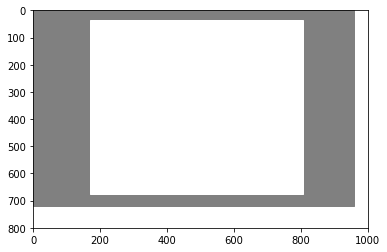

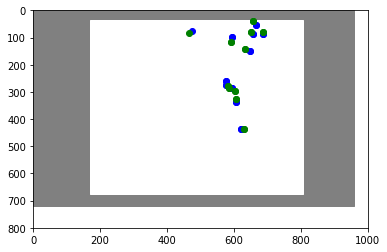

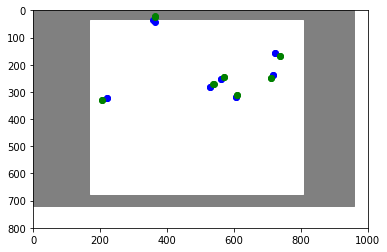

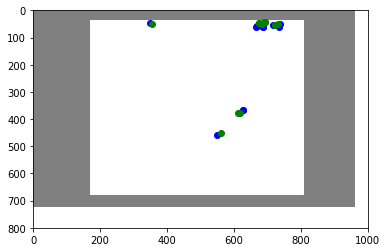

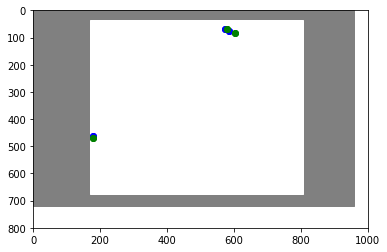

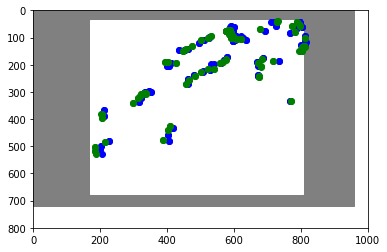

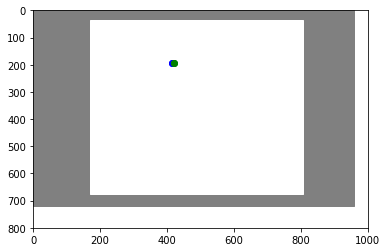

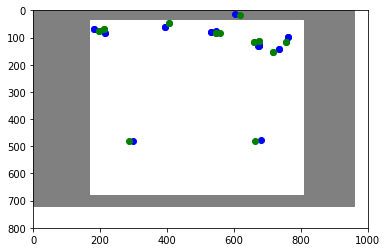

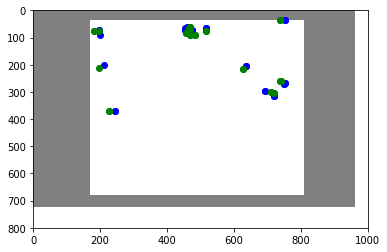

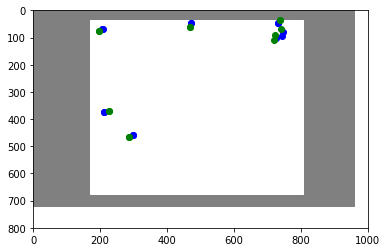

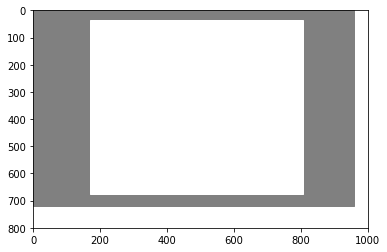

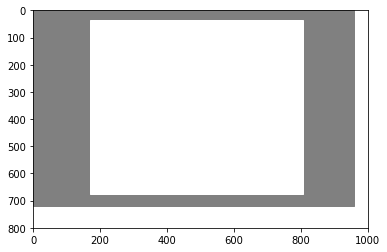

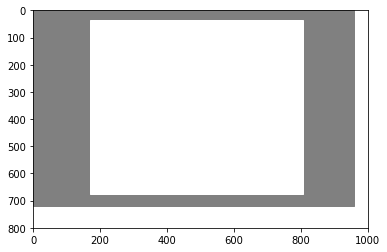

In [222]:
plots = []

for combinations in two_labels:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    rect1 = matplotlib.patches.Rectangle((0, 0),
                                         960, 720,
                                         color ='grey') #total video area
    rect2 = matplotlib.patches.Rectangle((170, 37),
                                         637, 637,
                                         color ='white') #total cage area
    ax.add_patch(rect1)
    ax.add_patch(rect2)
    plt.xlim([0,1000])
    plt.ylim([800, 0])
    
    
    distances = pd.concat([combinations[0], combinations[1]], axis=1) #create dataframe for each combination contained within two_labels e.g concatenating the dataframes snout1 and snout2
    distances['dist_pixels']=np.linalg.norm(combinations[0].values.astype(float) - combinations[1].values.astype(float), axis=1) #distance between body parts of combination
    distances['dist_cm'] = distances['dist_pixels']*one_pixel #convert to cm
    distances['interaction'] = distances['dist_cm']<threshold #apply threshold
    interactions_true_table = distances.loc[distances["interaction"]== True] #locate points below threshold
    
    #define coordinates for each combination
    r1_x = np.array(interactions_true_table.iloc[:,0]).astype('float')
    r1_y = np.array(interactions_true_table.iloc[:,1]).astype('float')
    
    r2_x = np.array(interactions_true_table.iloc[:,2]).astype('float')
    r2_y = np.array(interactions_true_table.iloc[:,3]).astype('float')
    
    plt.scatter(r1_x, r1_y, color='blue')
    plt.scatter(r2_x, r2_y, color='green')
    